In [32]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter

In [78]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [79]:
#Standard columns for all datasets
columns = [
    "Fishing", "TugTow", "Recreational", "Passenger" , "Cargo", "Tanker", "Other", "Unavailable", "Total"
]

target_fishing = "Fishing"
target_tugtow = "TugTow"
target_rec = "Recreational"
target_passenger = "Passenger"
target_cargo = "Cargo"
target_tanker = "Tanker"
target_other = "Other"
target_unavailable = "Unavailable"
target_total = "Total"

In [80]:
#this will take in the clean data from the SQLite database
#set up engine will take place here first. 

file_path = Path('ml_data.csv')
df = pd.read_csv(file_path, index_col=0)


# Drop the null rows
df = df.dropna()


df.head(15)

,Fishing,TugTow,Recreational,Passenger,Cargo,Tanker,Other,Unavailable
100,11,42,291,40,44,10,27,7
101,12,41,285,37,42,10,26,9
102,12,45,212,41,51,10,29,5
103,9,45,197,40,52,12,26,4
104,14,39,212,40,52,12,29,9
105,16,43,220,42,50,12,23,12
106,16,39,244,47,44,15,24,6
107,13,42,300,42,54,12,25,7
108,11,40,292,34,56,14,23,6
109,12,48,216,50,52,14,30,4


In [81]:
df.dtypes

Fishing         int64
TugTow          int64
Recreational    int64
Passenger       int64
Cargo           int64
Tanker          int64
Other           int64
Unavailable     int64
dtype: object

In [96]:
# Create our target for fishing model
y = df[target_fishing]
#print(y)
# Create our features
X =  df.drop('Fishing', axis=1)

In [83]:
X.describe()

,TugTow,Recreational,Passenger,Cargo,Tanker,Other,Unavailable
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,47.030137,227.295890,42.547945,34.769863,11.063014,26.071233,14.709589
std,8.768492,46.659806,11.266308,9.277568,3.510405,4.631518,12.468115
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,196.000000,35.000000,27.000000,9.000000,23.000000,6.000000
50%,47.000000,222.000000,45.000000,33.000000,12.000000,26.000000,9.000000
75%,54.000000,256.000000,51.000000,43.000000,13.000000,29.000000,16.000000
max,69.000000,411.000000,69.000000,56.000000,21.000000,42.000000,53.000000


In [97]:
#split into training data 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape
print(X_test)

     TugTow  Recreational  Passenger  Cargo  Tanker  Other  Unavailable
90       44           200         38     44       4     29           11
268      50           321         61     21      16     28           16
251      56           250         45     29       8     30            9
259      57           279         53     31      12     34           12
54       46           184         26     42       7     26           42
..      ...           ...        ...    ...     ...    ...          ...
111      46           196         45     51      13     22            8
365      39           220         43     29      18     19            7
4        39           169         22     25       7     20           27
30       33           213         25     28       9     24           30
9        35           229         22     29       4     23           26

[92 rows x 7 columns]


In [98]:
classifier = LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression()

In [99]:
y_pred = classifier.predict(X_test)
#print(y_pred)
#print(y_test)
fishing_results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
fishing_results.head(20)

,Prediction,Actual
0,13.767144,16
1,12.313526,13
2,12.563453,7
3,12.587851,9
4,13.549207,12
5,13.444816,10
6,12.278864,12
7,12.487038,14
8,13.760303,16
9,14.136376,16


ValueError: x and y must be the same size

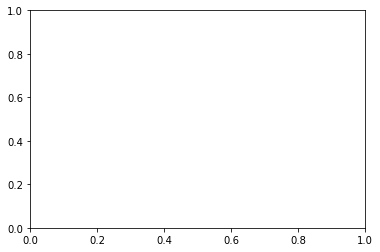

In [94]:
plt.scatter(X,y, color="black")
#plt.plot(X_test, y_pred, color="blue", linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()